Task 1: Introduction and Project Overview

Task 2: Load the Data and Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [5]:
iris = pd.read_csv('iris.data', header=None)

In [6]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
#type of species
type_of_species = iris['species'].unique()
print(type_of_species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Task 3: Visualize the Data

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

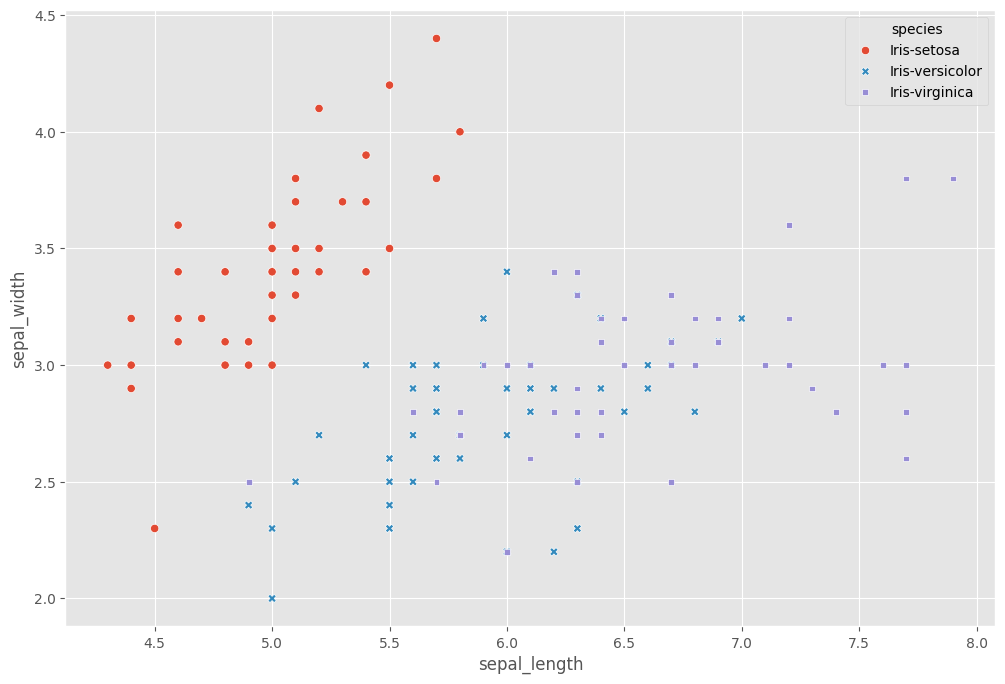

In [11]:
sns.scatterplot(
    x = iris.sepal_length,
    y = iris.sepal_width,
    hue = iris.species,
    style = iris.species
)

Task 4: Data Standardization

In [14]:
X = iris.iloc[:,0:4].values
y = iris.species.values

In [18]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

Task 5: Compute the Eigenvectors and Eigenvalues

In [20]:
#get the covariance matrix
iris_covariance_matrix = np.cov(X.T)
print('Covariance matric:\n', iris_covariance_matrix)

Covariance matric:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus they are orthonormal to each other.

In [21]:
#get the eigen values and eigen vectors
eigen_values, eigen_vectors = np.linalg.eig(iris_covariance_matrix)
print('Eigen Vectors:\n', eigen_vectors, '\n')
print('Eigen Values:\n', eigen_values)

Eigen Vectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigen Values:
 [2.93035378 0.92740362 0.14834223 0.02074601]


Task 6: Singular Value Decomposition (SVD)

In [22]:
eigen_vec_svd, s, v = np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

Task 7: Selecting Principal Components Using the Explained Variance

In [23]:
#how much the data is explained by each one the component

In [24]:
for val in eigen_values:
    print(val)

2.9303537755893165
0.9274036215173417
0.14834222648163994
0.020746013995596356


In [25]:
#get the percentage of each component
varaince_explained = [i/sum(eigen_values)*100 for i in  eigen_values]
varaince_explained

[72.77045209380132, 23.03052326768064, 3.68383195762739, 0.5151926808906425]

In [26]:
#get the cumulative percentage of each component
cumulative_varaince_explained = np.cumsum(varaince_explained)
cumulative_varaince_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

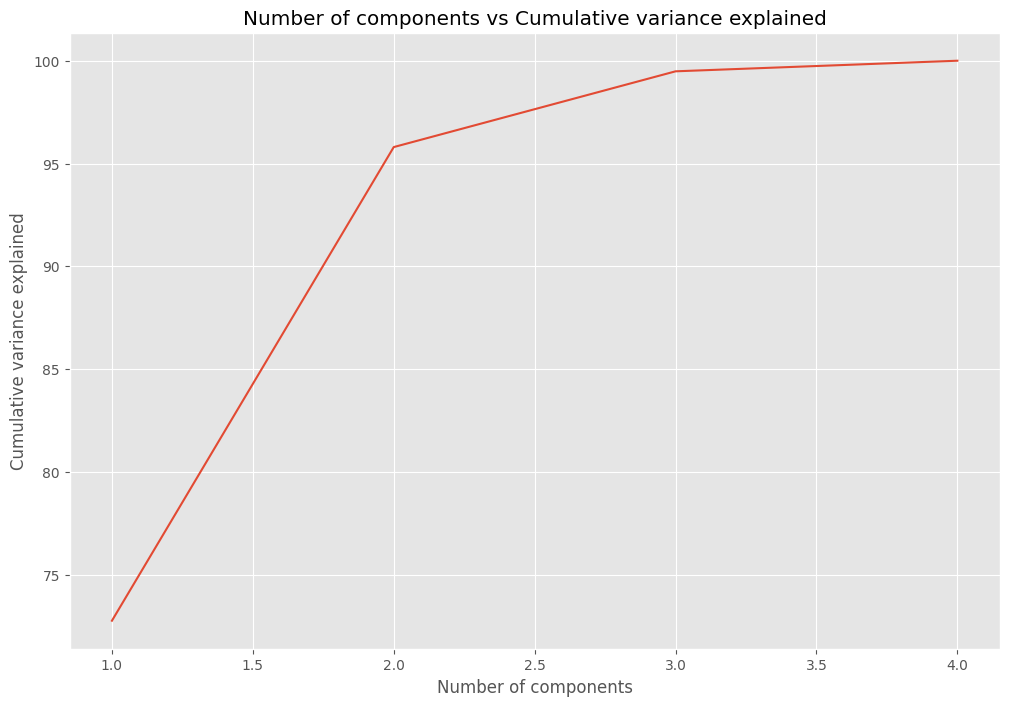

In [28]:
sns.lineplot(x=[1,2,3,4],
            y=cumulative_varaince_explained)
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance explained')
plt.title('Number of components vs Cumulative variance explained')
plt.show()

Here we can select first two components which little explained more than 90% of the variance in the data

Task 8: Project Data Onto Lower-Dimensional Linear Subspace

In [29]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [30]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T
print('Projection matrix: \n', projection_matrix)

Projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [37]:
X_pca = X.dot(projection_matrix)

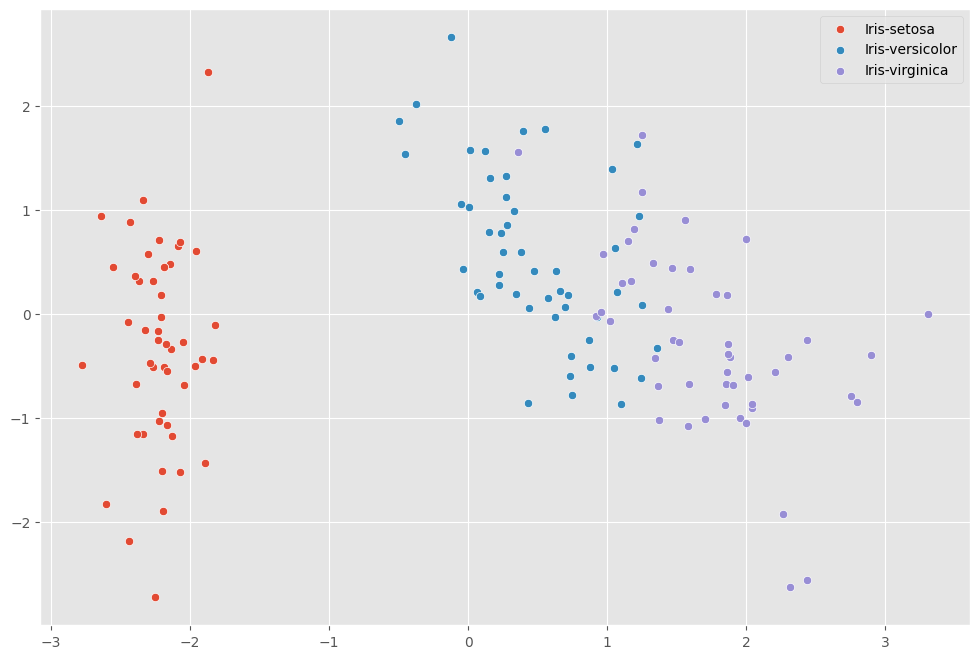

In [40]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(x = X_pca[y==species, 0], 
                    y = X_pca[y==species, 1],
                   label = species)